<a href="https://colab.research.google.com/github/Eunchong1276/Marketing-Analysis-2/blob/main/%ED%8C%A8%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%8D%BC%EC%8A%A4_%EB%B0%94%EC%9D%B4%ED%8B%B0%EB%94%94%EA%B7%B8%EB%A6%AC_%ED%8C%8C%EC%9D%B4%EB%84%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **패스트캠퍼스 바이티디그리 파이널 프로젝트**

## 1.Introduction

### 1-1. 데이터 명세

| course       | description         | notes      |
| ------------ | ------------------- | ---------- |
| id           | 강의id               |            |
| type         | 타입                 |            |
|              | BOOK                | 전자책     |
|              | COURSE              | 강의       |
| state        | 상태                 |            |
|              | ONGOING             | 진행중     |
|              | ENDED               | 완료       |
|              | PENDING             | 지연됨     |
|              | HIDDEN              | 숨겨짐     |
| created_at   | 제작날짜             |            |
| updated_at   | 업데이트날짜         |            |
| title        | 제목                 |            |
| description  | 강의 설명            |            |
| close_at     | 종료일자(1건외 전부 결측치) |    |
| total_class  | 강의시간(결측치 많음) |            |
| keywords     | 키워드(결측치 많음)  |            |


| Key            | Description   | Notes                                     |
|----------------|---------------|-------------------------------------------|
| id             | 주문 id       |                                           |
| type           | 상수 (ORDER)  |                                           |
| state          | 상태          |                                           |
|                | COMPLETED     | 완료됨                                    |
|                | PENDING       | 지연됨                                    |
|                | CANCELLED     | 취소됨                                    |
| name           | 강의 이름     |                                           |
| created_at     | 주문 날짜     |                                           |
| updated        | 업데이트 날짜  |                                           |
| customer_id    | 구매자 id     | customer의 'id' 외래키                    |
| list_price     | 기존 가격     | list_price - discount_price = sale_price  |
| sale_price     | 판매 가격     |                                           |
| discount_price | 할인액        |                                           |
| tax_free_price | 세액공제가     | 이번 프로젝트에서는 필요없음               |


| Key         | Description       | Notes               |
|-------------|-------------------|---------------------|
| id          | 구매id             |                     |
| type        | USER(상수)         |                     |
| state       | 상태               |                     |
|             | NORMAL            | 정상 이용 상태        |
|             | DELETED           | 삭제됨(강의 취소)     |
|             | WITHDRAWN         | 탈퇴함(회원 탈퇴)     |
|             | HIBERNATED        | 휴면 고객             |
| created_at  | 강의 신청 시각     |                     |
| updated_at  | 업데이트 시각      |                     |
| user_id     | 구매자 ID          |                     |
| name        | USER_id           |                     |
| phone       | 전화번호           |                     |
| email       | 이메일             |                     |


| Key            | Description        | Notes                                              |
|----------------|--------------------|----------------------------------------------------|
| id             | userid             |                                                    |
| type           | USER(상수)         |                                                    |
| state          | 상태               |                                                    |
|                | NORMAL             | 정상 이용 상태                                      |
|                | DELETED            | 삭제됨(강의 취소)                                    |
|                | WITHDRAWN          | 탈퇴함(회원 탈퇴)                                    |
|                | HIBERNATED         | 휴면 고객(마지막 로그인 날짜가 1년 전 이상으로 자동 휴면 고객) |
|                | ZOMBIE             | 활동이 없으나 휴면처리 되지 않은 고객                 |
| created_at     | 생성날짜            |                                                    |
| updated_at     | 변경날짜            |                                                    |
| last_login_at  | 마지막 로그인 날짜  |                                                    |
| username       | 가입아이디          |                                                    |


| Key             | Description              | Notes                                     |
|-----------------|--------------------------|-------------------------------------------|
| id              | 환불id                   |                                           |
| type            | ADMIN_AUTO_REFUND 상수   |                                           |
| state           | COMPLETED 상수           |                                           |
| created_at      | 거래날짜                 |                                           |
| updated_at      | 변경날짜                 |                                           |
| user_id         | 유저 id (customer, user) |                                           |
| course_id       | 강의id (course)          |                                           |
| amount          | 환불금액                 |                                           |
| tax_free_amount | 세액공제환불액            |                                           |


In [ ]:
# warnings 제거
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

import pandas as pd

In [ ]:
# 파일 불러오기 경로 설정
import os
os.chdir('/content/drive/MyDrive/ByteDegree/final_data')

In [ ]:
course = pd.read_csv('course1.csv')
customer = pd.read_csv('customer.csv')
refund = pd.read_csv('refund.csv')
order = pd.read_csv('f_order.csv')
user = pd.read_csv('f_user.csv')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

###1-2. Data Information Check

In [ ]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 722 non-null    int64  
 1   type               722 non-null    object 
 2   state              722 non-null    object 
 3   created_at         722 non-null    object 
 4   updated_at         722 non-null    object 
 5   title              722 non-null    object 
 6   description        554 non-null    object 
 7   close_at           15 non-null     object 
 8   total_class_hours  578 non-null    float64
 9   keywords           540 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 56.5+ KB


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123013 entries, 0 to 123012
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          123013 non-null  int64 
 1   type        123013 non-null  object
 2   state       123013 non-null  object
 3   created_at  123013 non-null  object
 4   updated_at  123013 non-null  object
 5   user_id     123013 non-null  int64 
 6   name        123013 non-null  object
 7   phone       123013 non-null  int64 
 8   email       123013 non-null  object
dtypes: int64(3), object(6)
memory usage: 8.4+ MB


In [ ]:
refund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12674 entries, 0 to 12673
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12674 non-null  int64  
 1   type             12674 non-null  object 
 2   state            12674 non-null  object 
 3   created_at       12674 non-null  object 
 4   updated_at       12674 non-null  object 
 5   user_id          12659 non-null  float64
 6   course_id        12075 non-null  float64
 7   amount           12674 non-null  int64  
 8   tax_free_amount  12674 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 891.3+ KB


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284035 entries, 0 to 284034
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              284035 non-null  int64 
 1   type            284035 non-null  object
 2   state           284035 non-null  object
 3   name            284035 non-null  object
 4   created_at      284035 non-null  object
 5   updated_at      284035 non-null  object
 6   customer_id     284035 non-null  int64 
 7   list_price      284035 non-null  int64 
 8   sale_price      284035 non-null  int64 
 9   discount_price  284035 non-null  int64 
 10  tax_free_price  284035 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 23.8+ MB


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122989 entries, 0 to 122988
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             122989 non-null  int64 
 1   type           122989 non-null  object
 2   state          122989 non-null  object
 3   created_at     122989 non-null  object
 4   updated_at     122989 non-null  object
 5   last_login_at  122989 non-null  object
 6   username       122988 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.6+ MB


데이터 명세와 Information을 확인한 결과 아래의 추가 확인 및 전처리가 필요합니다.
```
1. 모든 테이블에 날짜 컬럼이 있으므로 최대값, 최소값(데이터 수집 기간) 확인 필요
2. created_at, updated_at, last_login_at의 유형이 통일되어 있지않음(datetime으로 타입 변경 필요)
```

In [ ]:
# 데이터 수집 기간 확인(created_at)
tables = ['course', 'customer', 'order', 'user', 'refund']

for table in tables:
    df = globals()[table]
    print(table, '수집 기간', df['created_at'].min(), '~', df['created_at'].max())

course 수집 기간 2018-05-03 1:19 ~ 2022-12-27 1:33
customer 수집 기간 2015-02-14 15:00 ~ 2024-01-24 4:44
order 수집 기간 2022-01-01 00:08:19 ~ 2022-12-31 23:42:49
user 수집 기간 2019-07-01 23:49:35 ~ 2022-12-31 23:39:19
refund 수집 기간 2022-01-03 1:04 ~ 2022-12-30 7:29


In [ ]:
# 데이터 수집 기간 확인(updated_at)
tables = ['course', 'customer', 'order', 'user', 'refund']

for table in tables:
    df = globals()[table]
    print(table, '수집 기간', df['updated_at'].min(), '~', df['updated_at'].max())

course 수집 기간 2021-07-13 0:01 ~ 2024-01-25 9:25
customer 수집 기간 2019-09-18 0:55 ~ 2024-01-26 0:00
order 수집 기간 2022-01-01 00:09:30 ~ 2023-08-28 06:47:46
user 수집 기간 2022-01-03 00:28:14 ~ 2024-01-26 02:03:41
refund 수집 기간 2022-01-03 1:04 ~ 2022-12-30 7:29


### 1-3. 데이터 전처리

#### Datetime으로 Type 변경

In [ ]:
# created_at, updated_at datetime 타입으로 변경
tables = ['course', 'customer', 'order', 'user', 'refund']

for table in tables:
  df = globals()[table]
  df['created_at'] = pd.to_datetime(df['created_at'])
  df['updated_at'] = pd.to_datetime(df['updated_at'])

In [ ]:
# closed_at, last_login_at datetime으로 변경
course['close_at'] = pd.to_datetime(course['close_at'])
user['last_login_at'] = pd.to_datetime(user['last_login_at'])

#### 상수 컬럼 삭제

In [ ]:
# 상수 컬럼 확인 및 삭제
for table in tables:
  df = globals()[table]
  unique_counts = df.nunique()
  constant_columns = unique_counts[unique_counts == 1].index.tolist()

  print(table, '상수 컬럼', constant_columns)

  df.drop(columns = constant_columns, inplace = True)

course 상수 컬럼 []
customer 상수 컬럼 ['type', 'phone']
order 상수 컬럼 ['type']
user 상수 컬럼 ['type']
refund 상수 컬럼 ['type', 'state']


## 2.ERD
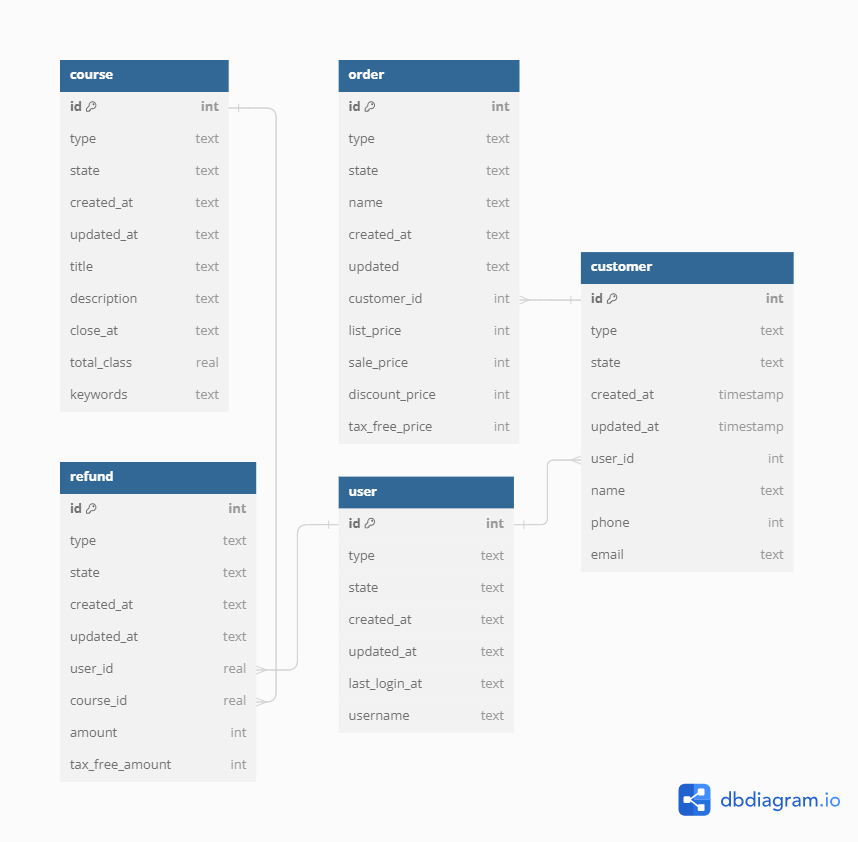

원본 데이터를 기준으로 ERD를 먼저 확인하였습니다.

모든 테이블에서 id가 존재하지만, 테이블마다 값이 다르기 때문에 한 테이블로 Join 하는 것은 어렵습니다.

외래키로 다른 테이블의 id를 가지고 있는 테이블끼리 조인해서 추출하였습니다.

## 3.SQL Data Extract

SQL 데이터 조인 및 추출은 DBeaver로 진행하였기 때문에 마크다운으로 코드만 기재 후 추출한 CSV를 불러오겠습니다.

### 3-1. 데이터 조인
```
SELECT * FROM f_order ord --order와 customer 테이블 조인
LEFT OUTER JOIN customer cust
ON ord.customer_id = cust.id;

SELECT * FROM customer cust --customer과 user 테이블 조인
LEFT OUTER JOIN f_user  user
ON cust.user_id = user.id;

SELECT * FROM refund rfd --refund와 course 테이블 조인
LEFT OUTER JOIN course1 crs
ON rfd.course_id = crs.id;

SELECT * FROM f_order ord --order, customer, user 테이블 조인
LEFT OUTER JOIN customer cust
ON ord.customer_id = cust.id
LEFT OUTER JOIN f_user user
ON cust.user_id = user.id;

```

In [ ]:
# 데이터 불러오기
customer_user = pd.read_csv('customer_user.csv')
order_customer = pd.read_csv('order_customer.csv', encoding='euc-kr')
order_customer_user = pd.read_csv('order_customer_user.csv', encoding='euc-kr')
refund_course = pd.read_csv('refund_course1.csv', encoding='utf-8')

In [ ]:
refund_course.head()

,id,type,state,created_at,updated_at,user_id,course_id,amount,tax_free_amount,id.1,type.1,state.1,created_at.1,updated_at.1,title,description,close_at,total_class_hours,keywords
0,72124,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:29,2022-12-30 7:29,619833.0,214323.0,-20000,-20000,214323.0,COURSE,ONGOING,2022-11-24 9:18,2023-11-30 6:37,[쉐어엑스]플러스엑-214323,프로젝트 매니지먼트,NaN,10.0,"PLUSX\t, UXPACK\t, PROCESS\t, 플엑\t, 플러스엑스\t, u..."
1,72121,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:01,2022-12-30 7:01,146614.0,213905.0,-10000,-10000,213905.0,COURSE,ONGOING,2022-11-04 1:03,2023-11-20 1:36,초격차 패키지 : -213905,"21개 프로젝트,",NaN,85.0,"인터랙티브,웹개발,프로젝트,프론트엔드,frontend,HTML,자바스크립트,JAVA..."
2,72119,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:08,2022-12-30 6:08,541404.0,214402.0,0,0,214402.0,COURSE,ONGOING,2022-11-29 7:07,2023-11-29 9:02,빵형의 수학 없이 -214402,직접 AI 모델을,NaN,12.0,"인공지능,AI,머신러닝,인공지능기초,인공지능모델구현,인공지능왕초보,인공지능모델,인공..."
3,72117,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:00,2022-12-30 6:00,1056095.0,203935.0,-10000,-10000,203935.0,COURSE,HIDDEN,2020-12-29 5:16,2023-10-06 7:11,한 번에 끝내는 파-203935,파이썬 웹 개발+크,NaN,80.0,"Django,FastAPI,Flask,백엔드,backend,python,html,b..."
4,72116,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 5:57,2022-12-30 5:57,98880.0,213244.0,-20000,-20000,213244.0,COURSE,ONGOING,2022-09-13 7:14,2023-11-20 0:40,30개 사례로 배우-213244,각 산업군마다 정의,NaN,62.0,"Anomalydetection,이상탐지,머신러닝,이상진단"


### 3-2. 각 강의별 가장 첫번째로 신청한 유저와 가장 마지막에 신청한 유저 날짜
```
SELECT distinct name,
FIRST_VALUE(customer_id)  OVER (PARTITION BY name ORDER BY created_at ASC ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS first_user_id,
FIRST_VALUE(created_at) OVER (PARTITION BY name ORDER BY created_at ASC ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS first_user_date,
LAST_VALUE(customer_id) OVER (PARTITION by name ORDER BY created_at ASC ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS last_user_id,
LAST_VALUE(created_at) OVER (PARTITION BY name ORDER BY created_at ASC ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS last_user_date
FROM f_order
WHERE state = 'COMPLETED';
```

In [ ]:
course_user_date = pd.read_csv('course_user_date.csv', encoding='utf-8')
course_user_date

,name,first_user_id,first_user_date,last_user_id,last_user_date
0,\n한번에 끝내는 E,396223,2022-09-24 22:51:55,1009894,2022-10-31 13:28:02
1,[VOD+출판권],106662,2022-02-14 02:32:16,837726,2022-03-30 01:25:44
2,CLASS : 색,443708,2022-06-07 09:24:31,912867,2022-06-30 02:57:15
3,K-Digital,856508,2022-04-18 01:58:03,806478,2022-06-27 01:33:46
4,서비스 기획 PM,3189,2022-05-30 08:11:21,493883,2022-05-31 00:09:28
...,...,...,...,...,...
1078,현직 VC가 알려주,26752,2022-01-24 08:05:48,729669,2022-02-04 05:08:17
1079,화사한 색감과 빛의,552629,2022-09-05 10:09:12,1062123,2022-12-22 09:21:59
1080,확실하게 끝내는 포,135979,2022-01-02 11:04:06,137108,2022-12-31 14:20:49
1081,확장성 높은 아키텍,697837,2022-08-23 01:18:33,965984,2022-08-31 14:06:19


### 3-3. 월별 list_price 및 이전 월 대비 증가율
```
SELECT
  YEAR(created_at) AS Year,
  MONTH(created_at) AS Month,
  SUM(list_price) AS MonthlyTotal,
  SUM(list_price) - LAG(SUM(list_price)) OVER (ORDER BY YEAR(created_at), MONTH(created_at)) AS IncreaseAmount,
  ((SUM(list_price) - LAG(SUM(list_price)) OVER (ORDER BY YEAR(created_at), MONTH(created_at))) / LAG(SUM(list_price)) OVER (ORDER BY YEAR(created_at), MONTH(created_at))) * 100 AS IncreasePercent
FROM
  f_order
GROUP BY
  YEAR(created_at),
  MONTH(created_at)
ORDER BY
  Year,
  Month;
  ```

In [ ]:
# 월별 list_price 합계 및 전월대비 증가율
increase_pct = pd.read_csv('increase_pct.csv', encoding='utf-8')

# 연월 컬럼 생성
increase_pct['YearMonth'] = pd.to_datetime(increase_pct['Year'].astype(str) + '-' + increase_pct['Month'].astype(str))

increase_pct

,Year,Month,MonthlyTotal,IncreaseAmount,IncreasePercent,YearMonth
0,2022,1,892010000,NaN,NaN,2022-01-01
1,2022,2,638930000,-253080000.0,-28.3719,2022-02-01
2,2022,3,575210000,-63720000.0,-9.9729,2022-03-01
3,2022,4,565030000,-10180000.0,-1.7698,2022-04-01
4,2022,5,484560000,-80470000.0,-14.2417,2022-05-01
5,2022,6,565840000,81280000.0,16.7740,2022-06-01
6,2022,7,705720000,139880000.0,24.7208,2022-07-01
7,2022,8,662540000,-43180000.0,-6.1186,2022-08-01
8,2022,9,622000000,-40540000.0,-6.1189,2022-09-01
9,2022,10,602320000,-19680000.0,-3.1640,2022-10-01


In [ ]:
# 데이터 시각화(피라미드 차트)
positive_increase = increase_pct[increase_pct['IncreasePercent'] > 0]
negative_increase = increase_pct[increase_pct['IncreasePercent'] < 0]

fig = go.Figure()
fig.add_trace(go.Bar(
    x= positive_increase['YearMonth'],
    y= positive_increase['IncreasePercent'],
    orientation='v',
    marker=dict(color='blue')
))
fig.add_trace(go.Bar(
    x= negative_increase['YearMonth'],
    y= negative_increase['IncreasePercent'],
    orientation='v',
    marker=dict(color='red')
))

fig.update_layout(
    title = 'Monthly Increase Percent Pyramid Chart',
    barmode='overlay',
    bargap = 0.1,
    xaxis=dict(tickvals=increase_pct['YearMonth'].unique(), tickformat='%Y-%m')
)

fig.show()

## 4.Python Data Analysis & Visualization

### 4-1. 2022년 1월 매출 분석

In [ ]:
order.head()

,id,state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price
0,1600585,COMPLETED,[30일 수강] 엑,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0
1,1600580,COMPLETED,한번에 끝내는 재무,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000
2,1600579,COMPLETED,네오아카데미 : 까,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000
3,1600577,COMPLETED,백엔드 개발자를 위,2022-12-31 23:35:52,2022-12-31 23:36:09,1083664,20000,20000,10000,20000
4,1600574,COMPLETED,React Nati,2022-12-31 23:30:51,2022-12-31 23:31:13,1033553,20000,20000,0,20000


In [ ]:
# created_at, uplated_at datetime 형태로 변환
order['created_at'] = pd.to_datetime(order['created_at'])
order['updated_at'] = pd.to_datetime(order['updated_at'])

# 2022년 1월 중 가장 매출이 높았던 3일과 가장 매출이 낮았던 3일

# 2022년 1월, state가 COMPLETED인 데이터만 필터링
filtered_df = order[(order['state']=='COMPLETED') & (order['created_at'].dt.year == 2022) & (order['created_at'].dt.month == 1)]

# 날짜별 매출 합계
daily_sales = filtered_df.groupby(filtered_df['created_at'].dt.date).agg({
    'sale_price':['sum', 'count'],
    'customer_id':'nunique'
}).rename(columns={'sum':'Total_Sales', 'count':'Transactions', 'nunique':'Customer_count'})

# 컬럼 다중 레벨을 단일 레벨로 조정 (필요한 경우)
daily_sales.columns = ['_'.join(col).strip() for col in daily_sales.columns.values]

# 날짜를 컬럼으로 추가
daily_sales.reset_index(inplace=True)

# 매출 Top 3
top3_sales_days = daily_sales.sort_values(by='sale_price_Total_Sales', ascending=False).head(3)

# 매출 Bottom 3
bottom3_sales_days = daily_sales.sort_values(by='sale_price_Total_Sales', ascending=True).head(3)

print(top3_sales_days)
print(bottom3_sales_days)

    created_at  sale_price_Total_Sales  sale_price_Transactions  \
8   2022-01-09                30130000                     1195   
4   2022-01-05                24880000                     1276   
30  2022-01-31                22890000                      902   

    customer_id_Customer_count  
8                         1058  
4                         1149  
30                         728  
    created_at  sale_price_Total_Sales  sale_price_Transactions  \
0   2022-01-01                 5680000                      238   
21  2022-01-22                 6280000                      217   
1   2022-01-02                 7110000                      412   

    customer_id_Customer_count  
0                          223  
21                         186  
1                          383  


In [ ]:
top3_sales_days

,created_at,sale_price_Total_Sales,sale_price_Transactions,customer_id_Customer_count
8,2022-01-09,30130000,1195,1058
4,2022-01-05,24880000,1276,1149
30,2022-01-31,22890000,902,728


In [ ]:
bottom3_sales_days

,created_at,sale_price_Total_Sales,sale_price_Transactions,customer_id_Customer_count
0,2022-01-01,5680000,238,223
21,2022-01-22,6280000,217,186
1,2022-01-02,7110000,412,383


In [ ]:
daily_sales.head()

,created_at,sale_price_Total_Sales,sale_price_Transactions,customer_id_Customer_count
0,2022-01-01,5680000,238,223
1,2022-01-02,7110000,412,383
2,2022-01-03,21490000,1863,1671
3,2022-01-04,16860000,1029,906
4,2022-01-05,24880000,1276,1149


In [ ]:
# 데이터 시각화
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_sales['created_at'], y=daily_sales['sale_price_Total_Sales'],
                         mode='lines', name='Daily Sales'))
fig.add_trace(go.Scatter(x=top3_sales_days['created_at'], y=top3_sales_days['sale_price_Total_Sales'],
                         mode='markers', marker=dict(size=10, color='red'),
                         name = 'Top 3 Sales Days'))
fig.add_trace(go.Scatter(x=bottom3_sales_days['created_at'], y=bottom3_sales_days['sale_price_Total_Sales'],
                         mode='markers', marker=dict(size=10, color='blue'),
                         name = 'Bottom 3 Sales Days'))

fig.update_layout(title='Daily Sales for Jan 2022', xaxis_title='Date', yaxis_title='Sales')
fig.show()

가장 저조했던 일자는 2022년 1월 1일, 2일, 22일입니다.
2022년 1월 1일~2일의 경우 공휴일과 주말이 겹친 것이 저조한 원인 중 하나일 것으로 판단됩니다.

2022년 1월 22일의 경우, 구글링으로 서치해본 결과 패스트캠퍼스에서 할인 이벤트가 종료되었던 시기인 것으로 보입니다.

확인하기 위해, 2022년 1월 22일의 데이터만 필터링 해보겠습니다.

In [ ]:
order[order['created_at'].dt.date == pd.to_datetime('2022-01-22').date()].sort_values(by='discount_price', ascending=False).head(20)

,id,state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,discount_pct,created_month
260469,831678,COMPLETED,권오상의 금융 아카,2022-01-22 05:15:17,2022-01-22 05:15:18,681393,60000,0,60000,0,100.000000,202201
260401,831935,COMPLETED,권오상의 금융 아카,2022-01-22 08:42:24,2022-01-22 08:42:25,588738,50000,0,50000,0,100.000000,202201
260470,831674,COMPLETED,권오상의 금융 아카,2022-01-22 05:14:51,2022-01-22 05:14:52,681393,50000,0,50000,0,100.000000,202201
260531,831404,COMPLETED,한 번에 끝내는 딥,2022-01-22 01:10:48,2022-01-22 01:10:49,55337,30000,0,30000,0,100.000000,202201
260468,831704,COMPLETED,The RED :,2022-01-22 05:31:38,2022-01-22 05:32:02,160552,30000,30000,10000,30000,0.000000,202201
260327,832182,COMPLETED,The RED :,2022-01-22 12:12:26,2022-01-22 12:14:21,504843,30000,30000,10000,30000,0.000000,202201
260456,831769,COMPLETED,해외소싱으로 온라인,2022-01-22 06:31:24,2022-01-22 06:31:50,418049,20000,20000,10000,20000,0.000000,202201
260453,831787,COMPLETED,한 번에 끝내는 프,2022-01-22 06:41:20,2022-01-22 06:42:15,449529,30000,30000,10000,30000,0.000000,202201
260322,832190,COMPLETED,초격차 패키지 :,2022-01-22 12:16:57,2022-01-22 12:17:57,781580,40000,30000,10000,30000,25.000000,202201
260451,831796,COMPLETED,"GA4 탑재, 구글",2022-01-22 06:45:48,2022-01-22 06:46:41,781391,20000,20000,10000,20000,0.000000,202201


할인금액을 기준으로 내림차순 정렬을 했는데, 4개 주문건만 할인이 적용되었고 나머지는 할인이 적용되지 않았습니다. 할인 이벤트가 진행되지 않았을 확률이 높다고 판단됩니다.

### 4-2. 각 강의별 할인율

In [ ]:
# 강의 별 할인율 컬럼 추가
order['discount_pct'] = (order['list_price'] - order['sale_price']) / order['list_price'] * 100

# 연월 컬럼 추가
order['created_month'] = order['created_at'].dt.strftime('%Y%m')

# 월별 각 강의별 총합 및 개수
monthly_discount_sum_count = order.groupby(['created_month', 'name']).agg({
    'discount_pct' : ['sum', 'count']
}).reset_index()

monthly_discount_sum_count.columns = ['created_month', 'name', 'discount_sum', 'discount_count']

# 월별 강의별 할인율
monthly_discount_sum_count['avg_discount_pct'] = monthly_discount_sum_count['discount_sum'] / monthly_discount_sum_count['discount_count']

monthly_discount_sum_count

,created_month,name,discount_sum,discount_count,avg_discount_pct
0,202201,(B2B) 42SE,0.000000,4,0.000000
1,202201,(B2B) K-Di,1800.000000,36,50.000000
2,202201,(B2B) 디캠프,0.000000,3,0.000000
3,202201,(B2B) 비바리퍼,0.000000,7,0.000000
4,202201,(B2B) 빌리지베,0.000000,1,0.000000
...,...,...,...,...,...
4491,202212,현업 프로젝트로 배,0.000000,7,0.000000
4492,202212,현직 Advisor,100.000000,7,14.285714
4493,202212,화사한 색감과 빛의,100.000000,12,8.333333
4494,202212,확실하게 끝내는 포,750.000000,60,12.500000


In [ ]:
# 할인율 히트맵 데이터 시각화
# 각 강의별 평균 할인율
avg_discount = order.groupby('name')['discount_pct'].mean().reset_index()

# 할인율 내림차순으로 정렬 후 상위 10개 선택
top_10_discount = avg_discount.sort_values(by='discount_pct', ascending=False).head(10)

# 상위 10개 강의에 해당하는 데이터만 추출
top_10_discount_df = monthly_discount_sum_count[monthly_discount_sum_count['name'].isin(top_10_discount['name'])]

# 피벗 테이블 생성
pivot_table = top_10_discount_df.pivot(index='name', columns='created_month', values='avg_discount_pct')

# 히트맵 그리기
fig = px.imshow(pivot_table,
                labels=dict(x='Month', y='Course Name', color='Average Discount(%)'),
                x=pivot_table.columns,
                y=pivot_table.index,
                aspect='auto')


fig.show()

100% 할인 강의 수가 많기 때문에 히트맵으로는 유의미한 시각화를 할 수 없었습니다.

데이터프레임에 sale_price 총액 컬럼을 추가해서, 매출이 높은 강의들의 할인율을 분석해 보겠습니다.

In [ ]:
# 할인율 및 매출 데이터프레임
avg_discount_sum_sales = order.groupby('name').agg({
    'sale_price':'sum',
    'discount_pct':'mean'
}).reset_index()

# 매출을 내림차순으로 정렬 후 상위 10개 선택
top_10_sales = avg_discount_sum_sales.sort_values(by='sale_price', ascending=False).head(10)

# 상위 10개 데이터만 추출
top_10_sales_df = monthly_discount_sum_count[monthly_discount_sum_count['name'].isin(top_10_sales['name'])]

# 피벗 테이블 생성
pivot_table_sales = top_10_sales_df.pivot(index='name', columns='created_month', values='avg_discount_pct')

# 매출이 높은 순서대로 y축이 정렬되도록 피벗테이블 재배열
pivot_table_sales = pivot_table_sales.reindex(index=top_10_sales['name'])

# 히트맵 그리기
fig = px.imshow(pivot_table_sales,
                labels=dict(x='Month', y='Course Name', color='Average Discount(%)'),
                x=pivot_table_sales.columns,
                y=pivot_table_sales.index,
                aspect='auto')


fig.show()

### 4-3. 강의에서 가장 많이 나온 키워드

In [ ]:
# 키워드 데이터가 있는 행을 쉼표로 분할
keywords_split = course['keywords'].str.split(',',expand=True).stack().reset_index(level=1, drop=True).to_frame('keywords')

# 분할한 데이터를 데이터프레임으로 지정
keyword_df = keywords_split.reset_index().rename(columns={'level_0' : 'index'})

# 키워드별 빈도 계산
keyword_counts = keyword_df['keywords'].value_counts().reset_index()

keyword_counts

,keywords,count
0,평생소장,91
1,프로그래밍,67
2,데이터사이언스,62
3,마케팅,47
4,디자인,42
...,...,...
2886,스타기법,1
2887,대기업합격,1
2888,구직자,1
2889,김민성,1


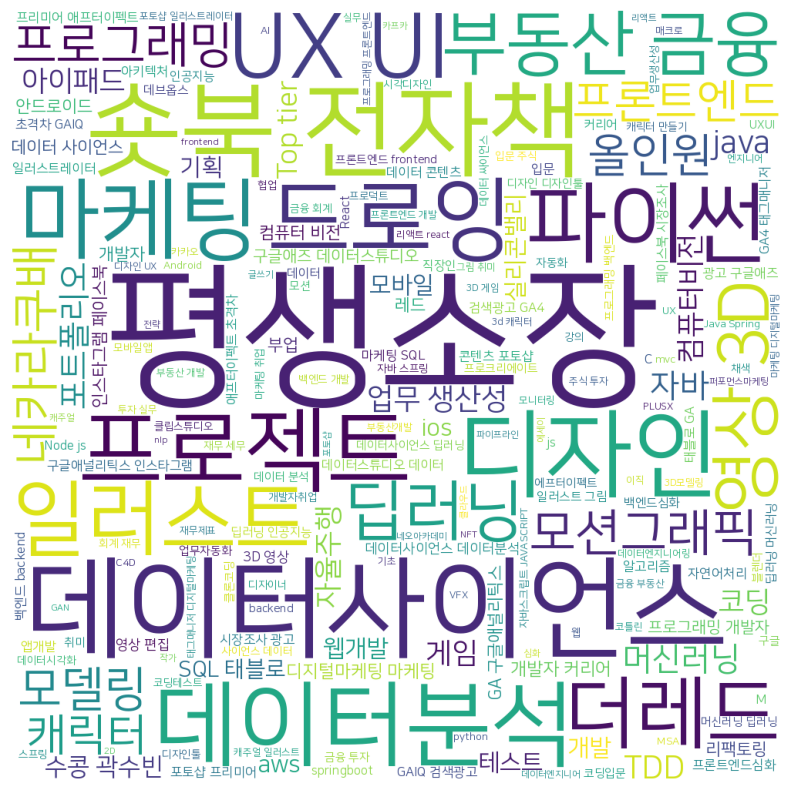

In [ ]:
# 한글 폰트 설정
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = '/content/drive/MyDrive/ByteDegree/final_data/NanumSquareR.ttf'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

# 데이터 시각화(워드클라우드)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

plt.figure(figsize = (20,10))

# 키워드 리스트를 공백으로 조인하여 문자열 생성
text = ' '.join(keyword_df['keywords'])

wordcloud = WordCloud(font_path=font_path, background_color = 'white', width = 1000, height = 1000, max_words = 200).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Treemap 라이브러리 import
!pip install matplotlib squarify

import matplotlib.pyplot as plt
import squarify

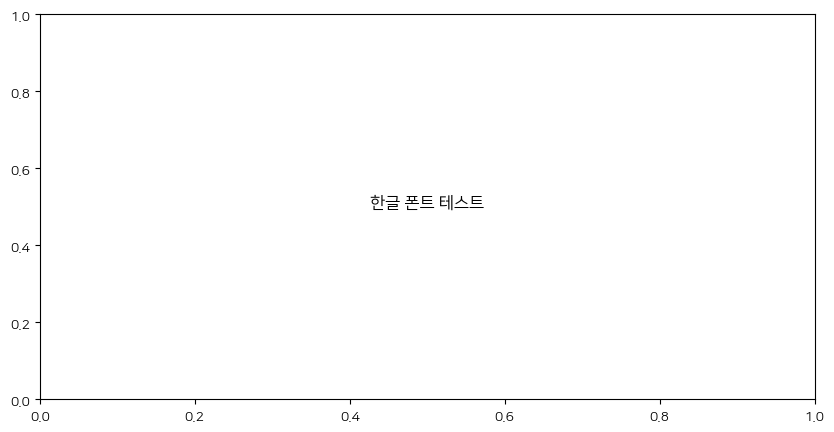

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로
font_path = '/content/drive/MyDrive/ByteDegree/final_data/NanumSquareR.ttf'

# 폰트 객체 생성
prop = fm.FontProperties(fname=font_path)

# 전역 폰트 설정
plt.rcParams['font.family'] = prop.get_name()

# 시각화 예시
plt.figure(figsize=(10, 5))
plt.text(0.5, 0.5, '한글 폰트 테스트', fontproperties=prop, size=12, ha='center')
plt.show()


In [ ]:
# Treemap 시각화(Top 10)
import matplotlib.font_manager as fm

font_path = '/content/drive/MyDrive/ByteDegree/final_data/NanumSquareR.ttf'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# 상위 10개만 필터링
top_keywords = keyword_counts.head(10)
top_keywords = top_keywords.reset_index()

fig = px.treemap(top_keywords, path=['index', 'keywords'], values='count',
                 color = 'keywords', hover_data = ['keywords'],
                 color_continuous_scale = 'RdBu',
                 title = 'Top 10 Keyword')
fig.update_layout(font=dict(family=font_path, size=18))
fig.show()

### 4-4. 환불이 가장 많은 강의

In [ ]:
refund_course.head()

,id,type,state,created_at,updated_at,user_id,course_id,amount,tax_free_amount,id.1,type.1,state.1,created_at.1,updated_at.1,title,description,close_at,total_class_hours,keywords
0,72124,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:29,2022-12-30 7:29,619833.0,214323.0,-20000,-20000,214323.0,COURSE,ONGOING,2022-11-24 9:18,2023-11-30 6:37,[쉐어엑스]플러스엑-214323,프로젝트 매니지먼트,NaN,10.0,"PLUSX\t, UXPACK\t, PROCESS\t, 플엑\t, 플러스엑스\t, u..."
1,72121,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 7:01,2022-12-30 7:01,146614.0,213905.0,-10000,-10000,213905.0,COURSE,ONGOING,2022-11-04 1:03,2023-11-20 1:36,초격차 패키지 : -213905,"21개 프로젝트,",NaN,85.0,"인터랙티브,웹개발,프로젝트,프론트엔드,frontend,HTML,자바스크립트,JAVA..."
2,72119,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:08,2022-12-30 6:08,541404.0,214402.0,0,0,214402.0,COURSE,ONGOING,2022-11-29 7:07,2023-11-29 9:02,빵형의 수학 없이 -214402,직접 AI 모델을,NaN,12.0,"인공지능,AI,머신러닝,인공지능기초,인공지능모델구현,인공지능왕초보,인공지능모델,인공..."
3,72117,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 6:00,2022-12-30 6:00,1056095.0,203935.0,-10000,-10000,203935.0,COURSE,HIDDEN,2020-12-29 5:16,2023-10-06 7:11,한 번에 끝내는 파-203935,파이썬 웹 개발+크,NaN,80.0,"Django,FastAPI,Flask,백엔드,backend,python,html,b..."
4,72116,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 5:57,2022-12-30 5:57,98880.0,213244.0,-20000,-20000,213244.0,COURSE,ONGOING,2022-09-13 7:14,2023-11-20 0:40,30개 사례로 배우-213244,각 산업군마다 정의,NaN,62.0,"Anomalydetection,이상탐지,머신러닝,이상진단"


In [ ]:
# refund를 course_id로 그룹화
refund_cnt = refund_course.groupby(['course_id','title']).size().sort_values(ascending=False).reset_index()

refund_cnt = refund_cnt.rename(columns={0:'count'})

# top 20
top20_refund_cnt = refund_cnt.head(20)

top20_refund_cnt

,course_id,title,count
0,211368.0,10개 프로젝트로 -211368,269
1,203525.0,한 번에 끝내는 J-203525,224
2,203720.0,한 번에 끝내는 프-203720,205
3,204373.0,일잘러 필수 스킬 -204373,187
4,212600.0,네오아카데미 : 완-212600,182
5,207343.0,스프링의 정석 : -207343,175
6,207513.0,블렌더로 만드는 동-207513,171
7,209597.0,한 번에 끝내는 데-209597,152
8,208856.0,30개 프로젝트로 -208856,137
9,208963.0,Kubernetes-208963,136


In [ ]:
# 막대 그래프로 시각화
px.bar(data_frame=top20_refund_cnt, x='title', y='count')

### 4-5. 강의를 가장 많이 신청한 고객과 그 금액

In [ ]:
# order, customer, user join 테이블
order_customer_user

# customer user id별 그룹화
# customer_cnt = order_customer_user.groupby(['customer_id']).size().sort_values(ascending=False).reset_index()
customer_cnt = order_customer_user.groupby(['customer_id']).agg({
  'sale_price' : 'sum',
  'id' : 'nunique'
}).sort_values('id' ,ascending=False).reset_index()

customer_cnt = customer_cnt.rename(columns={'sale_price' : 'total_price', 'id' : 'count'})

top_customer = customer_cnt.iloc[0]

top_customer

customer_id    793517
total_price    590000
count             338
Name: 0, dtype: int64

### 4-6. 주말과 주중의 강의 신청율

In [ ]:
# Weekday, Weekend 여부 컬럼 생성
order['Weekday'] = order['created_at'].dt.weekday

order['Weekday'] = order['Weekday'].map(lambda x : 'Weekend' if x in[5, 6] else 'Weekday')

# 주말/주중의 강의 신청 수
weekday_orders = order[order['Weekday'] == 'Weekday']['id'].count() / 5
weekend_orders = order[order['Weekday'] == 'Weekend']['id'].count() / 2

# 전체 신청 수
total_orders = weekday_orders + weekend_orders

# 비율 게산
weekday_order_ratio = weekday_orders / total_orders * 100
weekend_order_ratio = weekend_orders / total_orders * 100

print('주중 강의 신청률', round(weekday_order_ratio , 2), '%')
print('주말 강의 신청률', round(weekend_order_ratio, 2), '%')


주중 강의 신청률 53.6 %
주말 강의 신청률 46.4 %


In [ ]:
# 데이터 시각화(파이 차트)
labels = ['Weekday', 'Weekend']
values = [weekday_orders, weekend_orders]

fig = go.Figure()

fig.add_traces(go.Pie(labels=labels, values=values))
fig.update_traces(hole=.3, textposition='outside', textinfo='label+percent', textfont_size=16, textfont_color='black')

fig.show()

### 4-7. 회원가입 활발한 시간대 및 월별 차이

In [ ]:
# 회원가입(created_at) 시간대 컬럼 생성
customer['created_hour'] = customer['created_at'].dt.hour

# 회원가입 연월 컬럼 생성
customer['created_ymonth'] = customer['created_at'].dt.strftime('%Y%m')
customer.head()

,id,state,created_at,updated_at,user_id,name,email,created_hour,created_ymonth
0,1482394,NORMAL,2024-01-24 04:44:00,2024-01-24 13:54:00,959919,USER_1482394,USER_1482394@notexistemail.com,4,202401
1,1482300,NORMAL,2024-01-24 04:43:00,2024-01-25 06:10:00,818301,USER_1482300,USER_1482300@notexistemail.com,4,202401
2,1482071,NORMAL,2024-01-24 04:41:00,2024-01-25 07:46:00,543671,USER_1482071,USER_1482071@notexistemail.com,4,202401
3,1445268,NORMAL,2023-12-27 04:17:00,2023-12-27 04:17:00,824733,USER_1445268,USER_1445268@notexistemail.com,4,202312
4,1445150,NORMAL,2023-12-27 04:15:00,2023-12-27 04:15:00,767404,USER_1445150,USER_1445150@notexistemail.com,4,202312


In [ ]:
# 시간대별 회원가입 수
customer_hour_cnt = customer.groupby('created_hour').size().reset_index()
customer_hour_cnt = customer_hour_cnt.rename(columns={0:'count'})

customer_hour_cnt

,created_hour,count
0,0,5365
1,1,6948
2,2,6673
3,3,5472
4,4,7317
5,5,7739
6,6,7951
7,7,8013
8,8,7561
9,9,6466


In [ ]:
# 상위 3개 시간대와 하위 3개 시간대
top3_hour = customer_hour_cnt.nlargest(3,'count')
bottom3_hour = customer_hour_cnt.nsmallest(3, 'count')

top3_hour

,created_hour,count
7,7,8013
6,6,7951
5,5,7739


In [ ]:
# 시각화
fig = go.Figure()
fig.add_trace(go.Scatter(x=customer_hour_cnt['created_hour'], y=customer_hour_cnt['count'],
                         mode='lines', name='Number of new registration'))
fig.add_trace(go.Scatter(x=top3_hour['created_hour'], y=top3_hour['count'],
                         mode='markers', marker=dict(size=10, color='red'),
                         name = 'Top 3 Hour'))
fig.add_trace(go.Scatter(x=bottom3_hour['created_hour'], y=bottom3_hour['count'],
                         mode='markers', marker=dict(size=10, color='blue'),
                         name = 'Bottom 3 Hour'))

fig.update_layout(title='Number of new registrations by time of day', xaxis_title='Hour', yaxis_title='Registration')
fig.show()

In [ ]:
# 연월별 회원가입 수
customer_ymonth_cnt = customer.groupby('created_ymonth').size().reset_index()
customer_ymonth_cnt = customer_ymonth_cnt.rename(columns={0:'count'})

fig = go.Figure()
fig.add_trace(go.Scatter(x=customer_ymonth_cnt['created_ymonth'], y=customer_ymonth_cnt['count'],
                         mode='lines', name='Number of new registration'))

fig.update_layout(title='Number of new registrations by time of day', xaxis_title='Year-month', yaxis_title='Registration')
fig.show()

In [ ]:
# 월별 회원가입 수
# customer에 월 컬럼 추가
customer['created_month'] = customer['created_at'].dt.month

customer_month_cnt = customer.groupby('created_month').size().reset_index()
customer_month_cnt = customer_month_cnt.rename(columns={0:'count'})

fig = go.Figure()
fig.add_trace(go.Bar(x=customer_month_cnt['created_month'], y=customer_month_cnt['count'],
                          name='Number of registration'))

fig.update_layout(title='Number of new registration by month', xaxis_title='Month', yaxis_title='Registration', xaxis=dict(tickmode='linear', tick0=1, dtick=1))
fig.show()

### 4-8. 강의 가격 도수분포표

In [ ]:
# 강의 가격 구간 설정(5만원)
max_price = order['list_price'].max()
bins = range(0, max_price+50000, 50000)
labels = [f'{i//10000 + 1} - {i//10000 + 4}만원' for i in range (0, max_price, 50000)]

order['price_group'] = pd.cut(order['list_price'], bins=bins, right=False, labels=labels)

# 도수분포표 데이터프레임 만들기(groupby)
list_price_df = order.groupby('price_group').size().reset_index().rename(columns = {0:'count'})
list_price_df

,price_group,count
0,1 - 4만원,267266
1,6 - 9만원,12565
2,11 - 14만원,3656
3,16 - 19만원,73
4,21 - 24만원,172
...,...,...
129,646 - 649만원,0
130,651 - 654만원,0
131,656 - 659만원,0
132,661 - 664만원,0


### 4-9. 월별 강의 State별 금액과 유저 비중

In [ ]:
# order_customer_user 조인 테이블에 월 컬럼 추가
order_customer_user['created_at'] = pd.to_datetime(order_customer_user['created_at'])
order_customer_user['created_month'] = order_customer_user['created_at'].dt.month

In [ ]:
# 월별 강의별 그룹핑 후 총 가격, 유저 수, 유저 비율 계산
course_price_user = order_customer_user.groupby(['created_month', 'state']).agg({
    'list_price' : 'sum',
    'user_id' : 'count'
})

total_users_per_month = course_price_user.groupby('created_month')['user_id'].transform('sum')

course_price_user['user_ratio'] = course_price_user['user_id'] / total_users_per_month * 100

course_price_user = course_price_user.rename(columns={'list_price':'total_price', 'user_id':'user_count'})

course_price_user

total_price  user_count  user_ratio
created_month state                                         
1             CANCELLED    218380000        6974   22.725495
              COMPLETED    515660000       18387   59.915928
              PENDING      157970000        5327   17.358577
2             CANCELLED    140410000        4989   21.295032
              COMPLETED    396660000       14632   62.455182
              PENDING      101860000        3807   16.249787
3             CANCELLED    138870000        4591   22.992938
              COMPLETED    341250000       12030   60.249412
              PENDING       95090000        3346   16.757650
4             CANCELLED    132670000        3989   22.024072
              COMPLETED    326280000       10906   60.214223
              PENDING      106080000        3217   17.761705
5             CANCELLED    105310000        3365   19.634730
              COMPLETED    294430000       10783   62.918660
              PENDING       84820000        2990   17.446610
6             CANCELLED    126730000        4384   20.890117
              COMPLETED    336600000       12696   60.497475
              PENDING      102510000        3906   18.612408
7             CANCELLED    166920000        4843   20.392438
              COMPLETED    414130000       14963   63.004758
              PENDING      124670000        3943   16.602804
8             CANCELLED    142310000        5090   20.658306
              COMPLETED    370250000       13824   56.106173
              PENDING      149980000        5725   23.235521
9             CANCELLED    149670000        5043   22.695770
              COMPLETED    357260000       13091   58.915392
              PENDING      115070000        4086   18.388839
10            CANCELLED    131900000        4539   21.123418
              COMPLETED    370320000       13486   62.760611
              PENDING      100100000        3463   16.115972
11            CANCELLED    146690000        4670   22.183165
              COMPLETED    413810000       12928   61.409842
              PENDING      105790000        3454   16.406992
12            CANCELLED    180920000        5648   13.955327
              COMPLETED    691980000       28334   70.008895
              PENDING      176760000        6490   16.035778

### 4-10. 휴면 유저 로그인

In [ ]:
# 휴면 유저 데이터프레임 생성
hibernated_user = user[user['state']=='HIBERNATED']

# 휴면 유저 마지막 로그인 - 가입일 컬럼 생성
hibernated_user['signup_to_last_login_days'] = hibernated_user['last_login_at'] - hibernated_user['created_at']

# 평균 구하기
hibernated_user['signup_to_last_login_days'].mean()

Timedelta('154 days 11:33:28.358140552')

휴먼 유저의 기준은 last_login_at과 가입일의 차이보다는 다른 기준이 있을 가능성이 크다고 판단됩니다.

데이터 수집 시점을 기준으로 마지막 로그인이 일정 시간 이상 지나면 자동으로 변경되는 시스템일 확률이 높기 때문에, 휴먼 유저의 마지막 로그인 일자와 user 전체의 마지막 로그인 일자의 가장 최근을 확인해 보도록 하겠습니다.

In [ ]:
print(hibernated_user['last_login_at'].max())
print(hibernated_user['last_login_at'].min())

print(user['last_login_at'].max())

2023-01-25 11:58:50
2021-11-14 12:00:19
2024-01-26 02:03:42


데이터 수집(추출)일은 2024년 1월 26일일 가능성이 높습니다.
그렇게 된다면 휴먼 유저의 마지막 로그인 중 가장 최신 일자가 2023년 1월 25일인 것은 마지막 로그인 일자로부터 1년이 지나면 자동으로 휴먼 유저로 state가 변경되는 것이라는 가설이 일치합니다.

## 5.Trend Analysis

### 5-1. Order 데이터 트렌드 분석

In [ ]:
order_customer_user.head()

,id,type,state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,...,phone,email,id.2,type.2,state.2,created_at.2,updated_at.2,last_login_at,username,created_month
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,...,1.012346e+09,USER_1083679@notexistemail.com,1075089.0,USER,NORMAL,2022-12-31 23:39:19,2023-12-02 00:00:22,2022-12-31 23:44:35,dkfk,12
1,1600577,ORDER,COMPLETED,백엔드 개발자를 위,2022-12-31 23:35:52,2022-12-31 23:36:09,1083664,20000,20000,10000,...,1.012346e+09,USER_1083664@notexistemail.com,1075074.0,USER,NORMAL,2022-12-31 22:46:31,2023-10-19 11:49:10,2023-10-19 11:49:10,theh,12
2,1600557,ORDER,COMPLETED,한 번에 끝내는 동,2022-12-31 23:19:37,2022-12-31 23:20:07,1083669,20000,20000,10000,...,1.012346e+09,USER_1083669@notexistemail.com,1075079.0,USER,NORMAL,2022-12-31 23:08:47,2023-12-03 23:34:39,2023-12-03 23:34:40,toqu,12
3,1600518,ORDER,COMPLETED,용호수의 돈 버는,2022-12-31 21:37:16,2022-12-31 21:37:42,1083649,30000,20000,10000,...,1.012346e+09,USER_1083649@notexistemail.com,1075059.0,USER,NORMAL,2022-12-31 21:35:42,2023-02-17 01:54:52,2023-02-17 01:54:52,kyg6,12
4,1600453,ORDER,CANCELLED,네오아카데미 : 까,2022-12-31 19:53:05,2022-12-31 19:54:44,1083627,20000,20000,10000,...,1.012346e+09,USER_1083627@notexistemail.com,1075037.0,USER,NORMAL,2022-12-31 19:49:41,2023-12-01 21:00:20,2022-12-31 19:51:22,adle,12


In [ ]:
# 2022년 주문 시각화(선 그래프)
# 환불 건 제외
cancel_order = order[order['state']=='CANCELLED']

# 환불이 되어도 주문 내역이 남아있는지 확인(주문 후 환불을 했을 때 주문 데이터가 그대로 남아있다면 id가 동일한 COMPLETED와 CANCELLED가 있을 것)
order[order['id'].isin(cancel_order['id'])]['state'].unique() # 확인 결과 존재하지 않음

# State가 COMPLETED인 건만 추출
completed_order = order[order['state']=='COMPLETED']

# 주문일 컬럼 생성(시간 제외)
completed_order['order_date'] = completed_order['created_at'].dt.date

# 일자별로 그룹 만든 후 카운트
completed_order_cnt = completed_order.groupby('order_date').size().reset_index()

completed_order_cnt = completed_order_cnt.rename(columns={0:'count'})

completed_order_cnt

,order_date,count
0,2022-01-01,238
1,2022-01-02,412
2,2022-01-03,1863
3,2022-01-04,1029
4,2022-01-05,1276
...,...,...
360,2022-12-27,988
361,2022-12-28,1033
362,2022-12-29,1366
363,2022-12-30,1191


In [ ]:
# 데이터 시각화
fig = go.Figure()
fig.add_trace(go.Scatter(x=completed_order_cnt['order_date'], y=completed_order_cnt['count'],
                         mode='lines', name='Number of Order'))

fig.update_layout(title='Number of Order By the date', xaxis_title='Date', yaxis_title='Order Count')
fig.show()

시각화 그래프로 확인 결과 1Q(1월~3월)에 주문 건수가 많은 것으로 보입니다.
추정되는 원인은 아래와 같습니다.

1. 새로운 강의가 많이 오픈되어서 자연스럽게 주문이 늘어나는 경우
2. 새해 다짐으로 강의 결제

In [ ]:
# 2022년 강의 개설 시각화
# 개설일 컬럼 생성
course['create_date'] = course['created_at'].dt.date
course['create_date'] = pd.to_datetime(course['create_date'])

# 개설일이 2022년인 강의만 필터링
course_2022 = course[course['create_date'].dt.year == 2022]

# 그룹화
course_2022_cnt = course_2022.groupby('create_date').size().reset_index()
course_2022_cnt = course_2022_cnt.rename(columns={0:'count'})

# 데이터 시각화
fig = go.Figure()
fig.add_trace(go.Scatter(x=course_2022_cnt['create_date'], y=course_2022_cnt['count'],
                         mode='lines', name='Number of New Courses'))

fig.update_layout(title='Number of New Courses by the date', xaxis_title='Date', yaxis_title='Course Count')
fig.show()

확실히 1월 10일에 다른 날 대비 강의가 많이 생성되었습니다.

User, Customer, Refund는 위에서 시각화를 진행하기도 했고 제출 기한이 이미 지나 빠르게 제출하는 것이 좋을 것 같아 부득이하게 생략하였습니다.

## 6.Data Reporting
월간 매출 분석 대시보드를 제작하였습니다.

[Tableau Public Dashboard 링크](https://public.tableau.com/views/ProjectDashboard_17130180422140/1?:language=ko-KR&publish=yes&:sid=&:display_count=n&:origin=viz_share_link)